In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
df=pd.read_csv(url,delim_whitespace=True,header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
df.columns=['Area','Perimeter','Compactness','Length of Kernel','Width of Kernel','Asymmetry Coefficent','Length of Kernel Groove','label']

In [4]:
df.shape

(210, 8)

In [5]:
df.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficent,Length of Kernel Groove,label
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of Kernel         210 non-null    float64
 4   Width of Kernel          210 non-null    float64
 5   Asymmetry Coefficent     210 non-null    float64
 6   Length of Kernel Groove  210 non-null    float64
 7   label                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [7]:
df.dtypes

Area                       float64
Perimeter                  float64
Compactness                float64
Length of Kernel           float64
Width of Kernel            float64
Asymmetry Coefficent       float64
Length of Kernel Groove    float64
label                        int64
dtype: object

In [8]:
df.isnull().sum().sort_values(ascending=False)

Area                       0
Perimeter                  0
Compactness                0
Length of Kernel           0
Width of Kernel            0
Asymmetry Coefficent       0
Length of Kernel Groove    0
label                      0
dtype: int64

In [9]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

[]

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['Area',
 'Perimeter',
 'Compactness',
 'Length of Kernel',
 'Width of Kernel',
 'Asymmetry Coefficent',
 'Length of Kernel Groove',
 'label']

In [11]:
x = df.drop('label', axis=1,inplace=True)

In [12]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Length of Kernel',
       'Width of Kernel', 'Asymmetry Coefficent', 'Length of Kernel Groove'],
      dtype='object')

In [37]:
# finding the optimal value of k
from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

[2996.300029225572,
 1226.7722357507325,
 610.0515390847189,
 548.1350703242053,
 478.17530553822496,
 422.3887072482348,
 316.9916830061864,
 283.38996658656197,
 237.7536967264852,
 217.7445297992589]

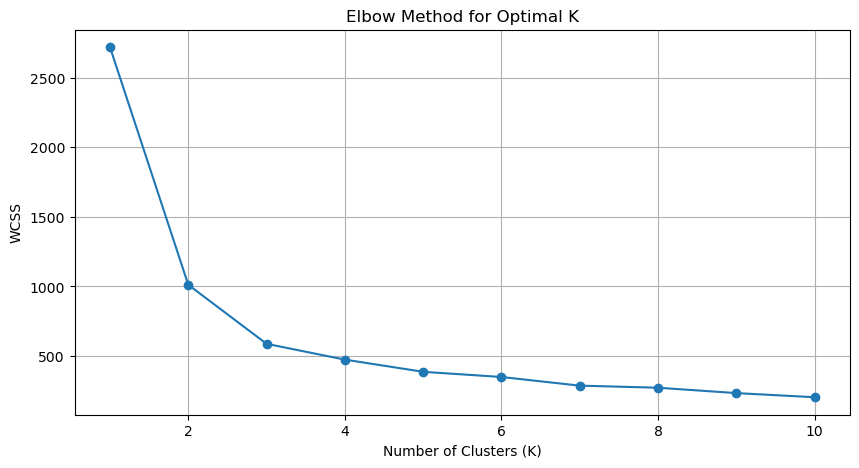

In [21]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

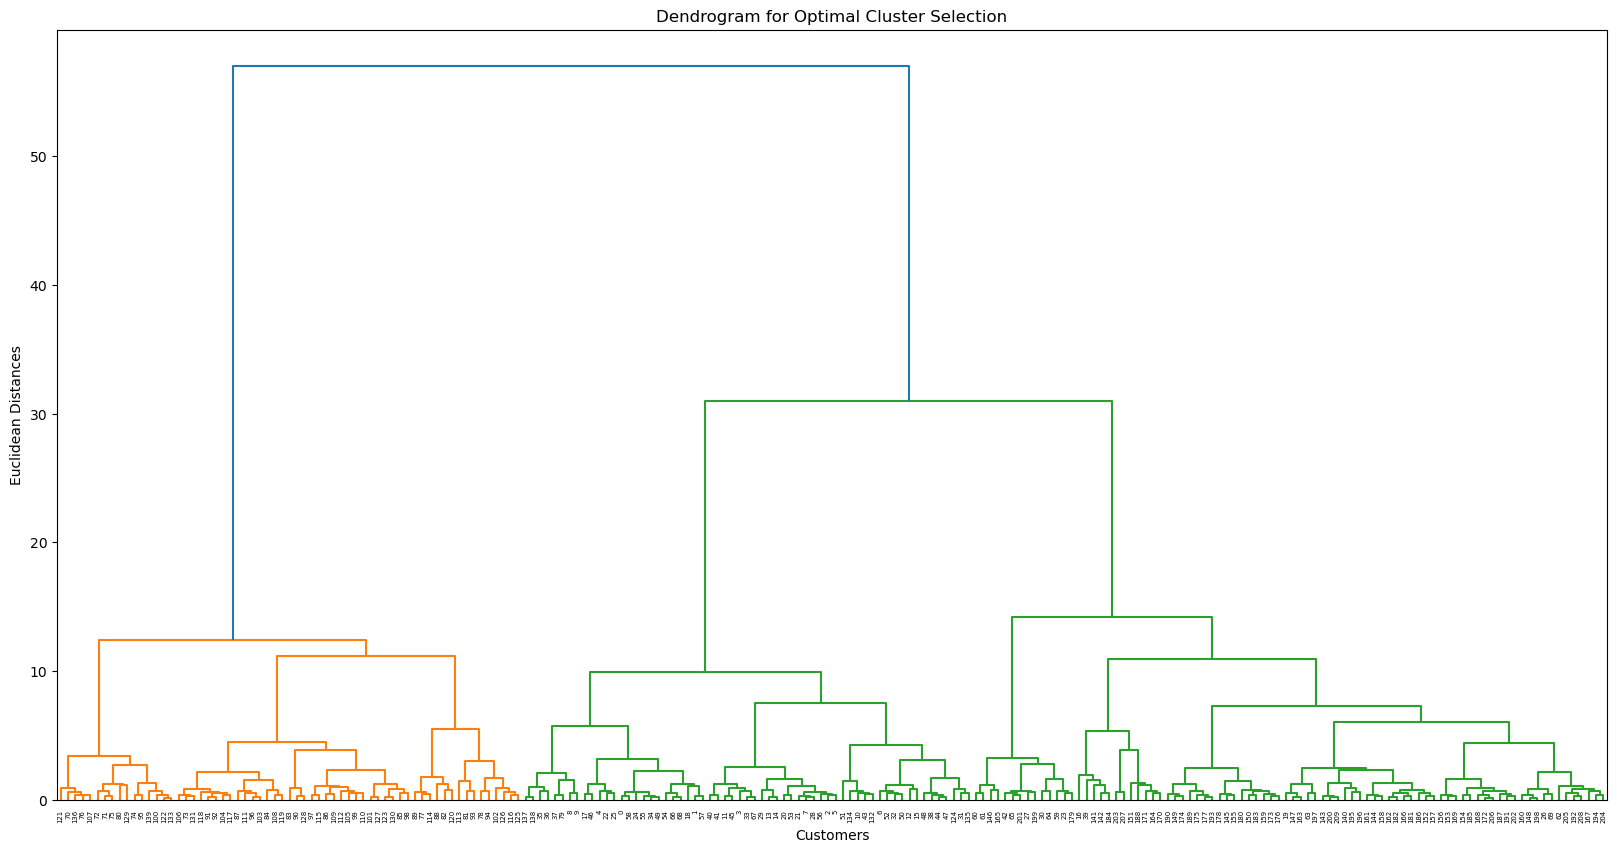

In [22]:
# Dendrogram to find optimal number of clusters
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 10))
linkage_matrix = linkage(df, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Optimal Cluster Selection")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

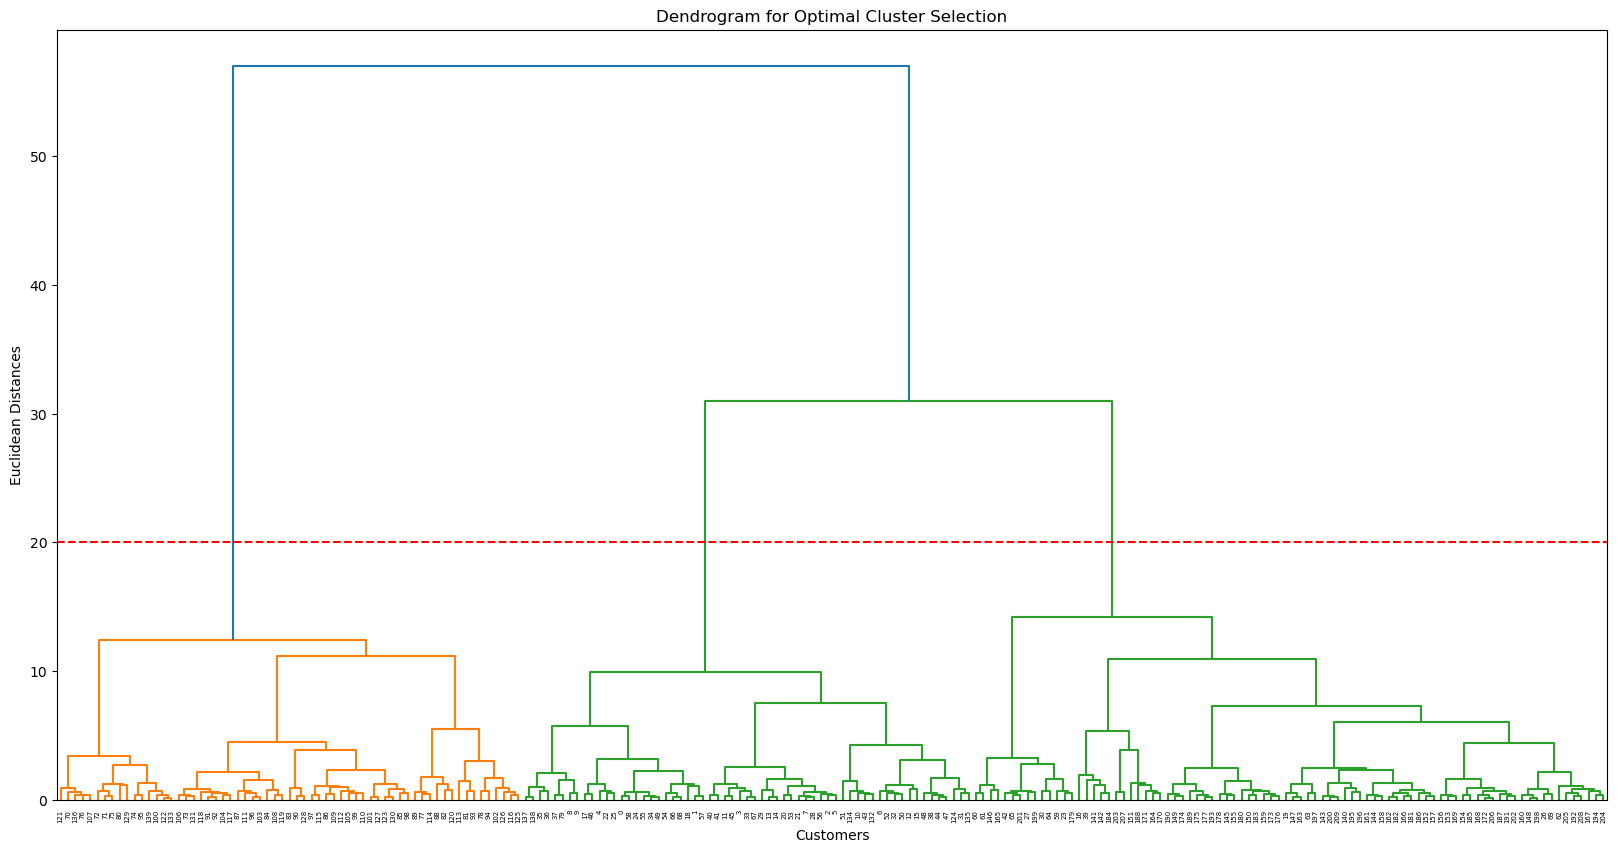

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 10))
linkage_matrix = linkage(df, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Optimal Cluster Selection")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.axhline(y=20,color='r',linestyle='--')
plt.show()

In [25]:
#Fit final KMeans using the chosen k
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

In [27]:
#Applying Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df)

In [ ]:
#Adding Cluster Labels to the Original Data
df['Cluster'] = y_kmeans # for k means
df.head()
df["label"] = y_hc # for aggloramative 
df.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficent,Length of Kernel Groove,Cluster,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2,2


In [32]:
#Visualize the Clusters using PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df)

<Axes: >

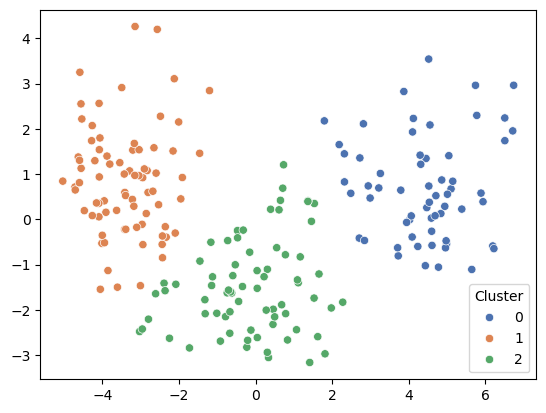

In [ ]:
# Plot the clusters using k means clustering
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=df['Cluster'],palette='deep')

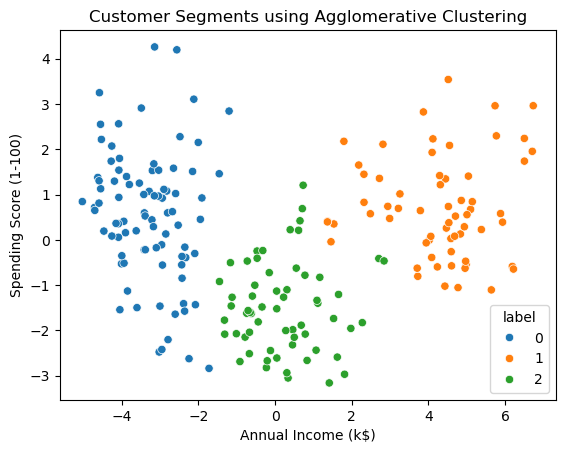

In [41]:
# aggloramative clustering visualization
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1],hue=df["label"],palette='tab10')
plt.title("Customer Segments using Agglomerative Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="label")
plt.show()
